# HANDWRITTEN DIGITS CLASSIFICATION IN 10 STEPS

The goal of this project is to teach how to train and evaluate a deep neural network for classifying handwritten digits in 10 easy steps, for educational purposes.

The steps are:
1. Import libraries
2. Choose settings
3. Load training & testing data
4. Define useful variables
5. Explore data
6. Process data
7. Define the neural network
8. Train the model
9. Evaluate model's performance
10. Inspect model's mistakes

# 1) Import libraries

We start by importing useful libraries, which will provide us all the tools we'll need, instead of coding them ourselves.

In [1]:
# Import libraries

# Mathematics
import numpy as np

# Plotting
import matplotlib.pyplot as plt

# Machine learning
from keras.datasets import mnist # Dataset for our model
from keras.models import Sequential # Type of model architecture we'll use
from keras.layers.core import Dense, Dropout, Activation # Building blocks we'll build the model with
from keras.utils import np_utils # Tools for processing data

# 2) Choose settings

We define any useful settings for our simulation, which we could later change from here to try different setups.

In [2]:
# Choose settings

num_epochs = 4 # Number of times that our model will see the entire dataset

plt.rcParams['figure.figsize'] = (10,10) # Figures sizes

# 3) Load training & testing data

We load the training and testing data, which are split into features (X) and their corresponding targets (y), where the targets are predicted from the features.

In [3]:
# Load training & testing data

(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 4) Define useful variables

We define any useful variables based on the data for future use, so we won't have to calcualte them multiple times.

In [4]:
# Define useful variables

num_classes = 10 # Number of classes to predict

# 5) Explore data

We explore the data to understand how many samples of each type do we have, and what are the dimensions of the images.

In [5]:
# Explore data

print('X_train original shape =', X_train.shape)
print('y_train original shape =', y_train.shape)

X_train original shape = (60000, 28, 28)
y_train original shape = (60000,)


In [6]:
print('X_test original shape =', X_test.shape)
print('y_test original shape =', y_test.shape)

X_test original shape = (10000, 28, 28)
y_test original shape = (10000,)


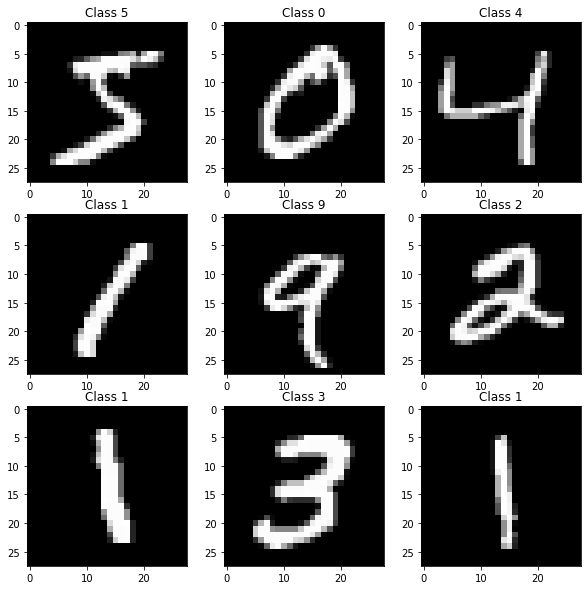

In [7]:
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.title('Class {}'.format(y_train[i]))

# 6) Process data

Our neural network accepts a 1D vector of features for each training sample, so we'll reshape the data such that each 28x28 image becomes a vector of length 784.

We'll also scale the inputs to be in the range [0-1] rather than [0-255]. This requires the values to be real instead of integers, so we change their type first.

As for the targets, we'll encode them into a one-hot encoded format:

```
0 -> [1, 0, 0, 0, 0, 0, 0, 0, 0]
1 -> [0, 1, 0, 0, 0, 0, 0, 0, 0]
2 -> [0, 0, 1, 0, 0, 0, 0, 0, 0]
etc.
```

Finally, we'll verify our processing.

In [8]:
# Process features

X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train = X_train / 255
X_test = X_test / 255

In [9]:
# Process targets

y_train_encoded = np_utils.to_categorical(y_train, num_classes)
y_test_encoded = np_utils.to_categorical(y_test, num_classes)

In [10]:
print('Training features matrix shape =', X_train.shape)
print('Testing features matrix shape =', X_test.shape)
print()
print('Max value of X_train = ', X_train.max())

Training features matrix shape = (60000, 784)
Testing features matrix shape = (10000, 784)

Max value of X_train =  1.0


In [11]:
print('Encoded training targets matrix shape =', y_train_encoded.shape)
print('Encoded testing targets matrix shape =', y_test_encoded.shape)

Encoded training targets matrix shape = (60000, 10)
Encoded testing targets matrix shape = (10000, 10)


# 7) Define the neural network

We'll use a simple 3 layer fully connected network.

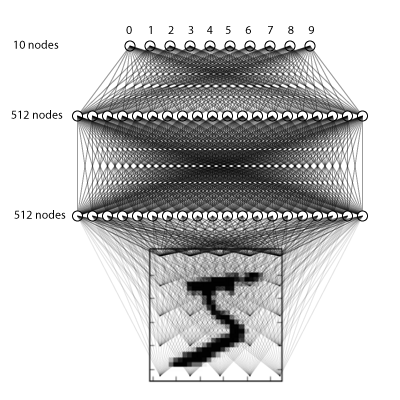

In [12]:
# Define the model

model = Sequential()

# Layer 1
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu')) # A non-linear function applied to the output
                              # of the previous layer, which nullifies negative values
model.add(Dropout(0.2)) # To prevent the model from memorizing the training data ("overfitting"),
                        # we randomly nullify a small precentage of its neurons

# Layer 2
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

# Layer 3
model.add(Dense(10))
model.add(Activation('softmax')) # Transforming the output into a valid probaility distribution,
                                 # with non-negative values which sum to 1.

In [13]:
# Compile the model

model.compile(loss = 'categorical_crossentropy',  # The error to minimize during training
              optimizer = 'adam',                 # Algorithm for minimizing the loss
              metrics = ['CategoricalAccuracy'])  # Metrics to calculate during training

# 8) Train the model

Now we can train the model on the training data.

In [14]:
# Train the model

model.fit(X_train,           # Training features
          y_train_encoded,   # Training targets
          batch_size=128,    # Number of samples to use for each loss minimization
          epochs=num_epochs, # Number of times that our model will see the entire dataset
          verbose=1)         # How much logs to present during training

Epoch 1/4
469/469 [==============================] - 25s 51ms/step - loss: 0.2481 - categorical_accuracy: 0.9252
Epoch 2/4
469/469 [==============================] - 27s 59ms/step - loss: 0.1003 - categorical_accuracy: 0.9689
Epoch 3/4
469/469 [==============================] - 14s 31ms/step - loss: 0.0723 - categorical_accuracy: 0.9771
Epoch 4/4
469/469 [==============================] - 14s 29ms/step - loss: 0.0557 - categorical_accuracy: 0.9819


# 9) Evaluate model's performance

To evaluate the performance of the trained model, we'll check the loss and prediction accuracy on the testing data. 

In [15]:
# Evaluate model's performance

scores = model.evaluate(X_test, y_test_encoded, verbose=0)
print('Test data loss:', round(scores[0], 4))
print('Test data accuracy:', round(scores[1], 4))

Test data loss: 0.0785
Test data accuracy: 0.9765


# 10) Inspect model's mistakes

Finally, let's verify the model behaves as expected, by plotting some samples which were classified correctly and some which were not.

In [16]:
# Inspect model's mistakes

predicted_probabilities = model.predict(X_test) # Predicted probabilities for each class
predicted_classes = np.argmax(predicted_probabilities, axis=1)

correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

313/313 [==============================] - 1s 3ms/step


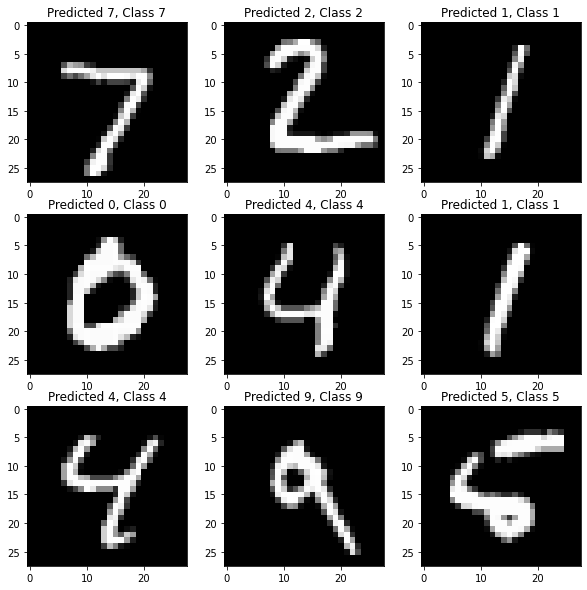

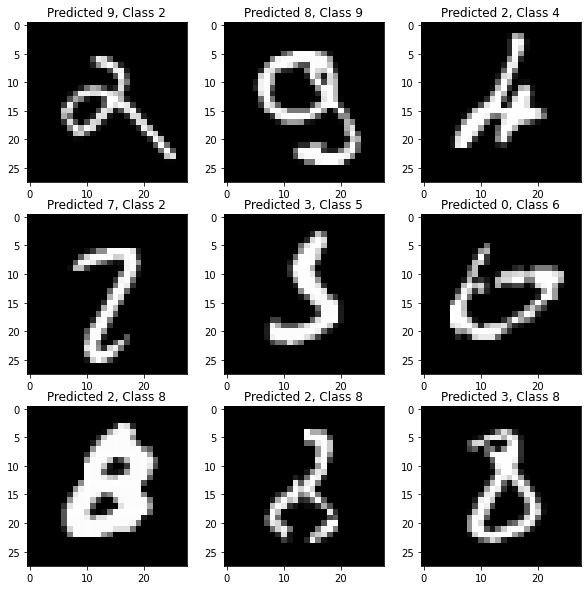

In [17]:
# Plot samples with right predictions

plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title('Predicted {}, Class {}'.format(predicted_classes[correct], y_test[correct]))
plt.show()
print('\n\n')

# Plot samples with wrong predictions

plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title('Predicted {}, Class {}'.format(predicted_classes[incorrect], y_test[incorrect]))
plt.show()